In [75]:
import pandas as pd
import os
from datetime import datetime, timedelta
import seaborn as sns

In [55]:
taarif_path = "./data/Basic - Azrieli & Sons data/taarif.csv"
taarif = pd.read_csv(taarif_path)
taarif.dropna(how='all', inplace=True)
taarif.head()

,customer,basic_taarif,extra_milage,night_bonus,weekend_bonus
1,jerusalem_muni,8.0,40.0,50.0,30.0
2,intel,8.0,6.0,20.0,0.0
3,aminach,15.0,4.0,0.0,25.0
4,yes,10.0,8.0,0.0,25.0
5,tnuva,6.0,3.0,80.0,0.0


In [56]:
taarif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer       12 non-null     object 
 1   basic_taarif   12 non-null     float64
 2   extra_milage   12 non-null     float64
 3   night_bonus    12 non-null     float64
 4   weekend_bonus  12 non-null     float64
dtypes: float64(4), object(1)
memory usage: 576.0+ bytes


In [57]:
drivers_with_kviut_path = "./data/Basic - Azrieli & Sons data/Drivers_with_kviut.csv"
drivers_with_kviut = pd.read_csv(drivers_with_kviut_path)
drivers_with_kviut.rename(columns={'Unnamed: 0': 'combined_id'}, inplace=True)
drivers_with_kviut['birthdate'] = pd.to_datetime(drivers_with_kviut['birthdate'], format='mixed')
drivers_with_kviut['kviut'] = True
drivers_with_kviut.head(10)

,combined_id,birthdate,gender,id,vetek,kviut
0,100,1964-05-27,m,502,7.9,True
1,101,1983-10-07,M,81,14.4,True
2,102,1992-10-15,M,814,18.7,True
3,103,1990-07-18,M,666,8.7,True
4,104,1969-10-04,M,205,9.9,True
5,105,1981-05-16,M,759,3.4,True
6,106,1988-09-18,M,96,9.4,True
7,107,1964-06-18,M,671,16.8,True
8,108,1987-09-10,M,100,17.2,True
9,109,1900-01-01,M,321,10.1,True


In [58]:
drivers_with_kviut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   combined_id  900 non-null    int64         
 1   birthdate    890 non-null    datetime64[ns]
 2   gender       887 non-null    object        
 3   id           900 non-null    int64         
 4   vetek        900 non-null    float64       
 5   kviut        900 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 36.2+ KB


In [59]:
new_drivers_path = "./data/Basic - Azrieli & Sons data/new_drivers.csv"
new_drivers = pd.read_csv(new_drivers_path)
new_drivers.rename(columns={'Unnamed: 0': 'combined_id'}, inplace=True)
new_drivers['birthdate'] = pd.to_datetime(new_drivers['birthdate'], format='mixed')
new_drivers['vetek'] = new_drivers['vetek'].apply(lambda x: round(x / 365, 1))
new_drivers['kviut'] = False
new_drivers.head(10)

,combined_id,birthdate,gender,id,vetek,kviut
0,0,1967-06-19,F,943,0.6,False
1,1,1979-02-13,M,966,0.1,False
2,2,1993-11-19,M,250,0.1,False
3,3,1961-02-02,NaN,156,0.7,False
4,4,1965-07-03,M,67,0.4,False
5,5,1900-01-01,M,684,0.5,False
6,6,1900-01-01,M,527,0.4,False
7,7,1975-03-19,M,556,0.8,False
8,8,1976-09-05,M,446,0.1,False
9,9,1977-09-05,M,841,0.7,False


In [60]:
new_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   combined_id  100 non-null    int64         
 1   birthdate    100 non-null    datetime64[ns]
 2   gender       97 non-null     object        
 3   id           100 non-null    int64         
 4   vetek        100 non-null    float64       
 5   kviut        100 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.1+ KB


In [61]:
all_drivers = pd.concat([new_drivers, drivers_with_kviut], ignore_index=True)
all_drivers.drop(columns=['combined_id'], inplace=True)
all_drivers.head()

,birthdate,gender,id,vetek,kviut
0,1967-06-19,F,943,0.6,False
1,1979-02-13,M,966,0.1,False
2,1993-11-19,M,250,0.1,False
3,1961-02-02,NaN,156,0.7,False
4,1965-07-03,M,67,0.4,False


In [62]:
all_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   birthdate  990 non-null    datetime64[ns]
 1   gender     984 non-null    object        
 2   id         1000 non-null   int64         
 3   vetek      1000 non-null   float64       
 4   kviut      1000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 32.4+ KB


In [63]:
trips_data_dir = os.listdir("./data/Basic - Azrieli & Sons data/trips_data")
trips_data_dir = [x for x in trips_data_dir if '(2)' not in x]
trips_data_dir_splitted = [x.split('_') for x in trips_data_dir]
trips_data_dir_dict = [{'date': x[0], 'truck_id': x[1].split('.')[0]} for x in trips_data_dir_splitted]
trips_data_dir_dict

[{'date': 'january 2015', 'truck_id': '4781600'},
 {'date': 'july 2015', 'truck_id': '4781558'},
 {'date': 'may 2015', 'truck_id': '4781695'},
 {'date': 'august 2015', 'truck_id': '4781824'},
 {'date': 'september 2015', 'truck_id': '4781558'},
 {'date': 'august 2015', 'truck_id': '4781830'},
 {'date': 'may 2015', 'truck_id': '4781681'},
 {'date': 'february 2015', 'truck_id': '4781529'},
 {'date': 'january 2015', 'truck_id': '4781614'},
 {'date': 'march 2015', 'truck_id': '4781794'},
 {'date': 'july 2015', 'truck_id': '4781564'},
 {'date': 'february 2015', 'truck_id': '4781501'},
 {'date': 'september 2015', 'truck_id': '4781570'},
 {'date': 'april 2015', 'truck_id': '4781697'},
 {'date': 'december 2015', 'truck_id': '4781688'},
 {'date': 'august 2015', 'truck_id': '4781818'},
 {'date': 'december 2015', 'truck_id': '4781850'},
 {'date': 'april 2015', 'truck_id': '4781683'},
 {'date': 'december 2015', 'truck_id': '4781844'},
 {'date': 'september 2015', 'truck_id': '4781564'},
 {'date': 'j

In [64]:
df = pd.DataFrame(trips_data_dir_dict)
df.describe()

,date,truck_id
count,6000,6000
unique,12,500
top,january 2015,4781600
freq,500,12


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      6000 non-null   object
 1   truck_id  6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


In [66]:
df['file_path'] = df['date'] + '_' + df['truck_id'] + '.csv'
grouped_by_truck_id = df.groupby('truck_id', observed=True)
grouped_by_truck_id

In [67]:
def merge_truck_data():
    for truck_id, group in grouped_by_truck_id:
        aggregated_truck_data = pd.DataFrame()
        for file_path, date in group[['file_path', 'date']].values:
            truck_data = pd.read_csv(
                f"./data/Basic - Azrieli & Sons data/trips_data/{file_path}")
            truck_data['truck_id'] = truck_id
            truck_data['date'] = date
            aggregated_truck_data = pd.concat(
                [aggregated_truck_data, truck_data], ignore_index=True)
        aggregated_truck_data.to_csv(
            f"./data/Basic - Azrieli & Sons data/trips_data_by_truck_id/{truck_id}.csv")

In [68]:
trips_data_by_truck_id_dir = os.listdir(f"./data/Basic - Azrieli & Sons data/trips_data_by_truck_id")
len(trips_data_by_truck_id_dir)

500

In [69]:
def merge_trips_data():
    trips_data = pd.DataFrame()
    for truck_id in trips_data_by_truck_id_dir:
        truck_data = pd.read_csv(
            f"./data/Basic - Azrieli & Sons data/trips_data_by_truck_id/{truck_id}")
        trips_data = pd.concat([trips_data, truck_data], ignore_index=True)
    trips_data.to_csv("./data/Basic - Azrieli & Sons data/trips_data_aggregated.csv")

In [70]:
aggregated_trips = pd.read_csv("./data/Basic - Azrieli & Sons data/trips_data_aggregated.csv")
aggregated_trips.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], inplace=True)
aggregated_trips.head(10)

,customer,driver_id,end_time,km,start_time,truck_id,date
0,yes,913,2015-10-01 06:08:00,314.412299,2015-10-01 02:04:00,4781469,october 2015
1,tnuva,784,2015-10-01 20:25:00,387.728884,2015-10-01 14:28:00,4781469,october 2015
2,electricity,196,2015-10-02 10:28:00,647.812057,2015-10-02 02:35:00,4781469,october 2015
3,tnuva,485,2015-10-02 22:04:00,491.782380,2015-10-02 14:48:00,4781469,october 2015
4,yes,238,2015-10-03 07:52:00,567.020223,2015-10-03 00:33:00,4781469,october 2015
5,iaf,946,2015-10-03 18:04:00,285.060767,2015-10-03 13:59:00,4781469,october 2015
6,jerusalem_muni,152,2015-10-04 02:37:00,217.005998,2015-10-04 00:01:00,4781469,october 2015
7,electricity,779,2015-10-04 18:33:00,443.712818,2015-10-04 12:18:00,4781469,october 2015
8,bituch_leumi,480,2015-10-05 03:35:00,133.599476,2015-10-05 01:43:00,4781469,october 2015
9,jerusalem_muni,444,2015-10-05 17:33:00,168.341740,2015-10-05 15:18:00,4781469,october 2015


In [71]:
aggregated_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318181 entries, 0 to 318180
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   customer    318181 non-null  object 
 1   driver_id   318181 non-null  int64  
 2   end_time    315098 non-null  object 
 3   km          318181 non-null  float64
 4   start_time  315032 non-null  object 
 5   truck_id    318181 non-null  int64  
 6   date        318181 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 17.0+ MB


In [72]:
aggregated_trips['start_time'] = pd.to_datetime(aggregated_trips['start_time'])
aggregated_trips['end_time'] = pd.to_datetime(aggregated_trips['end_time'])
aggregated_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318181 entries, 0 to 318180
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   customer    318181 non-null  object        
 1   driver_id   318181 non-null  int64         
 2   end_time    315098 non-null  datetime64[ns]
 3   km          318181 non-null  float64       
 4   start_time  315032 non-null  datetime64[ns]
 5   truck_id    318181 non-null  int64         
 6   date        318181 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 17.0+ MB


In [73]:
aggregated_trips.dropna(subset=['start_time', 'end_time'], how='all', inplace=True)

<Axes: xlabel='km', ylabel='Count'>

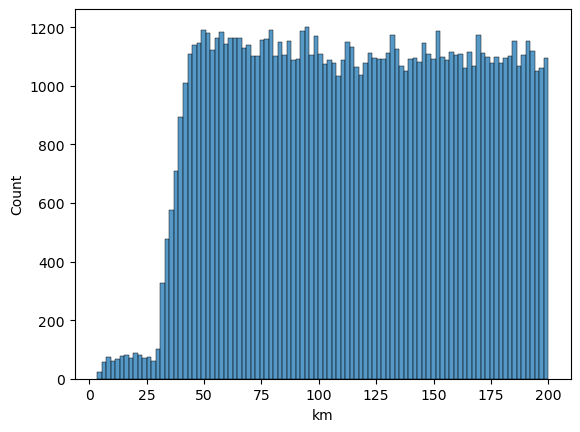

In [84]:
sns.histplot(aggregated_trips.query('km < 200')['km'], bins=100)


In [337]:
group_by_driver_id = aggregated_trips.groupby('driver_id', observed=True)
def fix_km(row, cutoff = 1000):
    if row['km'] >= cutoff:
        return row['km'] / 10
    return row['km']

In [338]:
aggregated_trips['km'] = aggregated_trips.apply(fix_km, axis=1)

In [339]:
aggregated_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318138 entries, 0 to 318180
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   customer    318138 non-null  object        
 1   driver_id   318138 non-null  int64         
 2   end_time    315098 non-null  datetime64[ns]
 3   km          318138 non-null  float64       
 4   start_time  315032 non-null  datetime64[ns]
 5   truck_id    318138 non-null  int64         
 6   date        318138 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 19.4+ MB


In [340]:
def add_taarif(row):
    customer = row['customer']
    if not customer:
        return None, None, None, None
    taarif_row = taarif[taarif['customer'] == customer]
    if taarif_row.empty:
        return None, None, None, None
    return taarif_row['basic_taarif'].values[0], taarif_row['extra_milage'].values[0], taarif_row['night_bonus'].values[0], taarif_row['weekend_bonus'].values[0]


In [341]:
aggregated_trips['basic_taarif'], aggregated_trips['extra_milage'], aggregated_trips['night_bonus'], aggregated_trips['weekend_bonus'] = zip(*aggregated_trips.apply(add_taarif, axis=1))
aggregated_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318138 entries, 0 to 318180
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   customer       318138 non-null  object        
 1   driver_id      318138 non-null  int64         
 2   end_time       315098 non-null  datetime64[ns]
 3   km             318138 non-null  float64       
 4   start_time     315032 non-null  datetime64[ns]
 5   truck_id       318138 non-null  int64         
 6   date           318138 non-null  object        
 7   basic_taarif   318138 non-null  float64       
 8   extra_milage   318138 non-null  float64       
 9   night_bonus    318138 non-null  float64       
 10  weekend_bonus  318138 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(2)
memory usage: 29.1+ MB


In [342]:
aggregated_trips['trip_duration'] = aggregated_trips['end_time'] - aggregated_trips['start_time']
average_velocity_per_driver = aggregated_trips.groupby('driver_id').apply(
    lambda x: (x['km'].sum() / x['trip_duration'].dt.total_seconds().sum()) * 3600
).reset_index(name='average_velocity_per_driver')

aggregated_trips = pd.merge(aggregated_trips, average_velocity_per_driver, on='driver_id', how='left')
aggregated_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318138 entries, 0 to 318137
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   customer                     318138 non-null  object         
 1   driver_id                    318138 non-null  int64          
 2   end_time                     315098 non-null  datetime64[ns] 
 3   km                           318138 non-null  float64        
 4   start_time                   315032 non-null  datetime64[ns] 
 5   truck_id                     318138 non-null  int64          
 6   date                         318138 non-null  object         
 7   basic_taarif                 318138 non-null  float64        
 8   extra_milage                 318138 non-null  float64        
 9   night_bonus                  318138 non-null  float64        
 10  weekend_bonus                318138 non-null  float64        
 11  trip_duration

/var/folders/pm/wnlkh7xd0gx096nr9129p76c0000gn/T/ipykernel_23464/232732930.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_velocity_per_driver = aggregated_trips.groupby('driver_id').apply(


In [343]:
def fill_null_trip_duration(row):
    if pd.isnull(row['trip_duration']):
        return pd.to_timedelta(row['km'] / row['average_velocity_per_driver'], unit='h')
    return row['trip_duration']

def fill_start_time(row):
    if pd.isnull(row['start_time']):
        return row['end_time'] - row['trip_duration']
    return row['start_time']

def fill_end_time(row):
    if pd.isnull(row['end_time']):
        return row['start_time'] + row['trip_duration']
    return row['end_time']

In [344]:
aggregated_trips.dropna(subset=['start_time', 'end_time'], how='all', inplace=True)
aggregated_trips['trip_duration'] = aggregated_trips.apply(fill_null_trip_duration, axis=1)
aggregated_trips['start_time'] = aggregated_trips.apply(fill_start_time, axis=1)
aggregated_trips['end_time'] = aggregated_trips.apply(fill_end_time, axis=1)
aggregated_trips['average_velocity_per_trip'] = aggregated_trips['km'] / aggregated_trips['trip_duration'].dt.total_seconds() * 3600
aggregated_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318138 entries, 0 to 318137
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   customer                     318138 non-null  object         
 1   driver_id                    318138 non-null  int64          
 2   end_time                     318138 non-null  datetime64[ns] 
 3   km                           318138 non-null  float64        
 4   start_time                   318138 non-null  datetime64[ns] 
 5   truck_id                     318138 non-null  int64          
 6   date                         318138 non-null  object         
 7   basic_taarif                 318138 non-null  float64        
 8   extra_milage                 318138 non-null  float64        
 9   night_bonus                  318138 non-null  float64        
 10  weekend_bonus                318138 non-null  float64        
 11  trip_duration

In [345]:
aggregated_trips[aggregated_trips['km'] > 200].info()

<class 'pandas.core.frame.DataFrame'>
Index: 222523 entries, 0 to 318137
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   customer                     222523 non-null  object         
 1   driver_id                    222523 non-null  int64          
 2   end_time                     222523 non-null  datetime64[ns] 
 3   km                           222523 non-null  float64        
 4   start_time                   222523 non-null  datetime64[ns] 
 5   truck_id                     222523 non-null  int64          
 6   date                         222523 non-null  object         
 7   basic_taarif                 222523 non-null  float64        
 8   extra_milage                 222523 non-null  float64        
 9   night_bonus                  222523 non-null  float64        
 10  weekend_bonus                222523 non-null  float64        
 11  trip_duration     

In [346]:
from uuid import uuid4

def split_trip(row):
    row['trip_id'] = str(uuid4())
    row['basic_trip'] = True
    if row['km'] <= 200:
        return [row]
    
    if row['start_time'] == row['end_time']: 
        return [row]
    
    if pd.isnull(row['trip_duration']):
        return [row]

    average_trip_velocity = row['km'] / row['trip_duration'].total_seconds() * 3600
    split_duration = pd.Timedelta(hours=(200 / max(average_trip_velocity, 1)))
    split_time = row['start_time'] + split_duration
    row1 = row.copy()
    row1['km'] = 200
    row1['end_time'] = split_time
    row1['trip_duration'] = split_duration
    row1['basic_trip'] = True
    row1['trip_id'] = str(uuid4())

    row2 = row.copy()
    row2['km'] = row['km'] - 200
    row2['start_time'] = split_time
    row2['trip_duration'] = row2['end_time'] - split_time
    row2['basic_trip'] = False
    row2['trip_id'] = row1['trip_id']
    
    return [row1, row2]


In [347]:
splitted_trips = pd.DataFrame([row for rows in aggregated_trips.apply(split_trip, axis=1) for row in rows])
splitted_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540661 entries, 0 to 318137
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   customer                     540661 non-null  object         
 1   driver_id                    540661 non-null  int64          
 2   end_time                     540661 non-null  datetime64[ns] 
 3   km                           540661 non-null  float64        
 4   start_time                   540661 non-null  datetime64[ns] 
 5   truck_id                     540661 non-null  int64          
 6   date                         540661 non-null  object         
 7   basic_taarif                 540661 non-null  float64        
 8   extra_milage                 540661 non-null  float64        
 9   night_bonus                  540661 non-null  float64        
 10  weekend_bonus                540661 non-null  float64        
 11  trip_duration     

In [348]:
splitted_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540661 entries, 0 to 318137
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   customer                     540661 non-null  object         
 1   driver_id                    540661 non-null  int64          
 2   end_time                     540661 non-null  datetime64[ns] 
 3   km                           540661 non-null  float64        
 4   start_time                   540661 non-null  datetime64[ns] 
 5   truck_id                     540661 non-null  int64          
 6   date                         540661 non-null  object         
 7   basic_taarif                 540661 non-null  float64        
 8   extra_milage                 540661 non-null  float64        
 9   night_bonus                  540661 non-null  float64        
 10  weekend_bonus                540661 non-null  float64        
 11  trip_duration     

In [349]:
def calculate_weekend_duration(row):
    start_time = row['start_time']
    end_time = row['end_time']
    
    if pd.isnull(start_time) or pd.isnull(end_time):
        return None
    
    days_until_friday = (4 - start_time.weekday()) % 7
    weekend_start_limit = start_time + timedelta(days=days_until_friday)
    weekend_start_limit = weekend_start_limit.replace(hour=16, minute=0, second=0, microsecond=0)
    weekend_end_limit = weekend_start_limit + timedelta(days=1, hours=4)
    weekend_duration = pd.Timedelta(0)
    current_time = start_time    
    while current_time < end_time:
        
        if weekend_start_limit <= current_time < weekend_end_limit:
            next_time = min(end_time, weekend_end_limit)
            weekend_duration += next_time - current_time
        else:
            if current_time < weekend_start_limit:
                next_time = weekend_start_limit
            else:
                weekend_start_limit += timedelta(days=7)
                weekend_end_limit += timedelta(days=7)
                next_time = weekend_start_limit
        current_time = next_time
    return weekend_duration

In [350]:
splitted_trips['weekend_duration'] = splitted_trips.apply(calculate_weekend_duration, axis=1)
splitted_trips['regular_week_duration'] = pd.to_timedelta(splitted_trips['trip_duration'] - splitted_trips['weekend_duration'], unit='h')
splitted_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540661 entries, 0 to 318137
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   customer                     540661 non-null  object         
 1   driver_id                    540661 non-null  int64          
 2   end_time                     540661 non-null  datetime64[ns] 
 3   km                           540661 non-null  float64        
 4   start_time                   540661 non-null  datetime64[ns] 
 5   truck_id                     540661 non-null  int64          
 6   date                         540661 non-null  object         
 7   basic_taarif                 540661 non-null  float64        
 8   extra_milage                 540661 non-null  float64        
 9   night_bonus                  540661 non-null  float64        
 10  weekend_bonus                540661 non-null  float64        
 11  trip_duration     

In [351]:
def calculate_day_night_trip_duration(row):
    start_time = row['start_time']
    end_time = row['end_time']
    
    if pd.isnull(start_time) or pd.isnull(end_time):
        return None, None
    
    start_day_time_limit = start_time.replace(hour=6, minute=0, second=0, microsecond=0)
    end_day_time_limit = start_time.replace(hour=22, minute=0, second=0, microsecond=0)
    
    day_time = pd.Timedelta(0)
    night_time = pd.Timedelta(0)
    
    current_time = start_time
    while current_time < end_time:
        if end_day_time_limit <= current_time < start_day_time_limit + timedelta(days=1):
            # Night time
            start_day_time_limit = start_day_time_limit + timedelta(days=1)
            next_time = min(end_time, start_day_time_limit)
            night_time += min(next_time, end_time) - current_time
        else:
            # Day time
            next_time = min(end_time, end_day_time_limit)
            day_time += min(next_time, end_time) - current_time
        current_time = next_time
    return day_time, night_time

In [352]:
splitted_trips['day_duration'], splitted_trips['night_duration'] = zip(*splitted_trips.apply(calculate_day_night_trip_duration, axis=1))
splitted_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540661 entries, 0 to 318137
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   customer                     540661 non-null  object         
 1   driver_id                    540661 non-null  int64          
 2   end_time                     540661 non-null  datetime64[ns] 
 3   km                           540661 non-null  float64        
 4   start_time                   540661 non-null  datetime64[ns] 
 5   truck_id                     540661 non-null  int64          
 6   date                         540661 non-null  object         
 7   basic_taarif                 540661 non-null  float64        
 8   extra_milage                 540661 non-null  float64        
 9   night_bonus                  540661 non-null  float64        
 10  weekend_bonus                540661 non-null  float64        
 11  trip_duration     

In [353]:
splitted_trips['night_km'] = splitted_trips.apply(lambda row: row['night_duration'].total_seconds() / 3600 * row['average_velocity_per_trip'], axis=1)
splitted_trips['weekend_km'] = splitted_trips.apply(lambda row: row['weekend_duration'].total_seconds() / 3600 * row['average_velocity_per_trip'], axis=1)
splitted_trips.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540661 entries, 0 to 318137
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype          
---  ------                       --------------   -----          
 0   customer                     540661 non-null  object         
 1   driver_id                    540661 non-null  int64          
 2   end_time                     540661 non-null  datetime64[ns] 
 3   km                           540661 non-null  float64        
 4   start_time                   540661 non-null  datetime64[ns] 
 5   truck_id                     540661 non-null  int64          
 6   date                         540661 non-null  object         
 7   basic_taarif                 540661 non-null  float64        
 8   extra_milage                 540661 non-null  float64        
 9   night_bonus                  540661 non-null  float64        
 10  weekend_bonus                540661 non-null  float64        
 11  trip_duration     

In [354]:
def calculate_income_per_trip(row):
    total_km = row['km']
    basic_taarif = row['basic_taarif']
    extra_milage = row['extra_milage']
    night_bonus = row['night_bonus'] / 100
    weekend_bonus = row['weekend_bonus'] / 100
    night_km = row['night_km']
    weekend_km = row['weekend_km']
    basic_trip = row['basic_trip']
    if basic_trip:
        return (basic_taarif * total_km + 
                basic_taarif * night_bonus * night_km +
                 basic_taarif * weekend_bonus * weekend_km)
    return (extra_milage * total_km + 
            extra_milage * night_bonus * night_km +
            extra_milage * weekend_bonus * weekend_km)

In [355]:
splitted_trips['income_per_trip'] = splitted_trips.apply(calculate_income_per_trip, axis=1)
splitted_trips.head()

,customer,driver_id,end_time,km,start_time,truck_id,date,basic_taarif,extra_milage,night_bonus,...,average_velocity_per_trip,trip_id,basic_trip,weekend_duration,regular_week_duration,day_duration,night_duration,night_km,weekend_km,income_per_trip
0,yes,913,2015-10-01 04:39:12.612808305,200.000000,2015-10-01 02:04:00.000000000,4781469,october 2015,10.0,8.0,0.0,...,77.314500,590cd44c-7c3a-4371-8fad-49e2171ca7f6,True,0 days,0 days 02:35:12.612808305,0 days 02:35:12.612808305,0 days,0.0,0.0,2000.000000
0,yes,913,2015-10-01 06:08:00.000000000,114.412299,2015-10-01 04:39:12.612808305,4781469,october 2015,10.0,8.0,0.0,...,77.314500,590cd44c-7c3a-4371-8fad-49e2171ca7f6,False,0 days,0 days 01:28:47.387191695,0 days 01:28:47.387191695,0 days,0.0,0.0,915.298390
1,tnuva,784,2015-10-01 17:32:08.957613354,200.000000,2015-10-01 14:28:00.000000000,4781469,october 2015,6.0,3.0,80.0,...,65.164518,851c9a39-13a4-4561-86b7-01250838e87e,True,0 days,0 days 03:04:08.957613354,0 days 03:04:08.957613354,0 days,0.0,0.0,1200.000000
1,tnuva,784,2015-10-01 20:25:00.000000000,187.728884,2015-10-01 17:32:08.957613354,4781469,october 2015,6.0,3.0,80.0,...,65.164518,851c9a39-13a4-4561-86b7-01250838e87e,False,0 days,0 days 02:52:51.042386646,0 days 02:52:51.042386646,0 days,0.0,0.0,563.186651
2,electricity,196,2015-10-02 05:01:01.800493270,200.000000,2015-10-02 02:35:00.000000000,4781469,october 2015,5.0,5.0,0.0,...,82.174891,6d1c5d25-3d54-4f50-96a0-53faecd188bc,True,0 days,0 days 02:26:01.800493270,0 days 02:26:01.800493270,0 days,0.0,0.0,1000.000000


In [356]:
grouped_by_driver_id = splitted_trips.groupby(['driver_id', 'date'])
income_per_grouped_by_driver_id = grouped_by_driver_id['income_per_trip'].sum().reset_index()
income_per_grouped_by_driver_id.rename(columns={'income_per_trip': 'income_per_month'}, inplace=True)
income_per_grouped_by_driver_id['income_per_month'] = income_per_grouped_by_driver_id['income_per_month'].apply(lambda x: round(x, 1))
km_per_grouped_by_driver_id = grouped_by_driver_id['km'].sum().reset_index()
km_per_grouped_by_driver_id.rename(columns={'km': 'total_km_per_month'}, inplace=True)
km_per_grouped_by_driver_id['total_km_per_month'] = km_per_grouped_by_driver_id['total_km_per_month'].apply(lambda x: round(x, 1))
final_df = pd.merge(income_per_grouped_by_driver_id, km_per_grouped_by_driver_id, on=['driver_id', 'date'], how='left')
final_df = pd.merge(final_df, all_drivers[['id', 'birthdate']], left_on='driver_id', right_on='id', how='left')
final_df['age'] = final_df['birthdate'].apply(lambda x: round((datetime.now() - x).days / 365, 1))
final_df.drop(columns=['birthdate', 'id'], inplace=True)
final_df = pd.merge(final_df, all_drivers[['id', 'vetek']], left_on='driver_id', right_on='id', how='left')
final_df.drop(columns=['id'], inplace=True)
final_df = pd.merge(final_df, all_drivers[['id', 'gender']], left_on='driver_id', right_on='id', how='left')
final_df.drop(columns=['id'], inplace=True)
final_df.head()

,driver_id,date,income_per_month,total_km_per_month,age,vetek,gender
0,1,april 2015,46492.0,6138.5,42.5,1.4,girl
1,1,august 2015,84673.7,9014.4,42.5,1.4,girl
2,1,december 2015,53991.6,7872.8,42.5,1.4,girl
3,1,february 2015,47346.4,5023.4,42.5,1.4,girl
4,1,january 2015,71762.8,7763.4,42.5,1.4,girl


In [357]:
final_df['gender'].unique()

array(['girl', 'boy', 'M', 'male', 'm', 'unknown', 'F', 'none', nan,
       'female', 'woman'], dtype=object)

In [358]:
def fix_gender(row):    
    gender = row['gender']
    if gender == 'girl':
        return 'F'
    if gender == 'female':
        return 'F'
    if gender == 'woman':
        return 'F'
    if gender == 'm':
        return 'M'
    if gender == 'boy':
        return 'M'
    if gender == 'male':
        return 'M'
    if gender == 'none':
        return 'M'
    if pd.isnull(gender):
        return 'M'
    if gender == 'unknown':
        return 'M'
    return gender

In [359]:
final_df['gender'] = final_df.apply(fix_gender, axis=1)
final_df.head()

,driver_id,date,income_per_month,total_km_per_month,age,vetek,gender
0,1,april 2015,46492.0,6138.5,42.5,1.4,F
1,1,august 2015,84673.7,9014.4,42.5,1.4,F
2,1,december 2015,53991.6,7872.8,42.5,1.4,F
3,1,february 2015,47346.4,5023.4,42.5,1.4,F
4,1,january 2015,71762.8,7763.4,42.5,1.4,F


In [360]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   driver_id           12000 non-null  int64  
 1   date                12000 non-null  object 
 2   income_per_month    12000 non-null  float64
 3   total_km_per_month  12000 non-null  float64
 4   age                 11880 non-null  float64
 5   vetek               12000 non-null  float64
 6   gender              12000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 656.4+ KB


In [361]:
final_df.to_csv("./data/Basic - Azrieli & Sons data/summery.csv")

## Incomes Distribution

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from bidi.algorithm import get_display

In [24]:
summery = pd.read_csv("./data/Basic - Azrieli & Sons data/summery.csv")
summery.drop(columns=['Unnamed: 0'], inplace=True)
summery.head()

,driver_id,date,income_per_month,total_km_per_month,age,vetek,gender
0,1,april 2015,46492.0,6138.5,42.5,1.4,F
1,1,august 2015,84673.7,9014.4,42.5,1.4,F
2,1,december 2015,53991.6,7872.8,42.5,1.4,F
3,1,february 2015,47346.4,5023.4,42.5,1.4,F
4,1,january 2015,71762.8,7763.4,42.5,1.4,F


In [25]:
summery.drop(summery['income_per_month'].idxmax(), inplace=True)
summery.count()

driver_id             11999
date                  11999
income_per_month      11999
total_km_per_month    11999
age                   11879
vetek                 11999
gender                11999
dtype: int64

In [26]:
summery.to_csv("./data/Basic - Azrieli & Sons data/summery.csv")

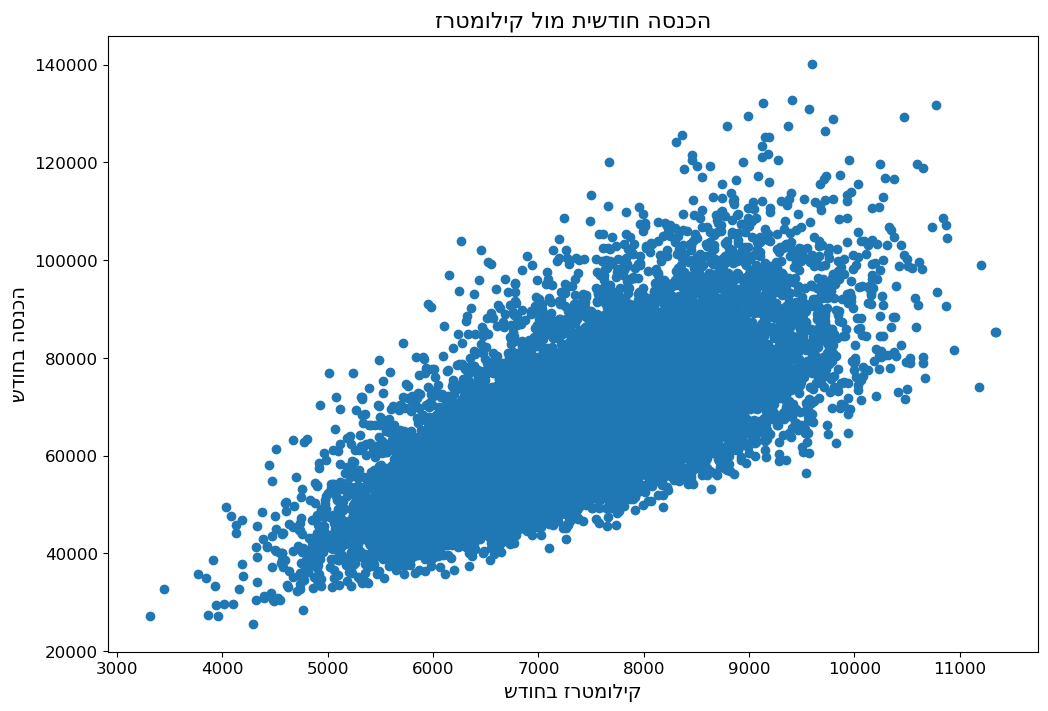

In [52]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(summery['total_km_per_month'], summery['income_per_month'])
plt.xlabel(get_display('קילומטרז בחודש'), fontsize=14)
plt.ylabel(get_display('הכנסה בחודש'), fontsize=14)
plt.title(get_display('הכנסה חודשית מול קילומטרז'), fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

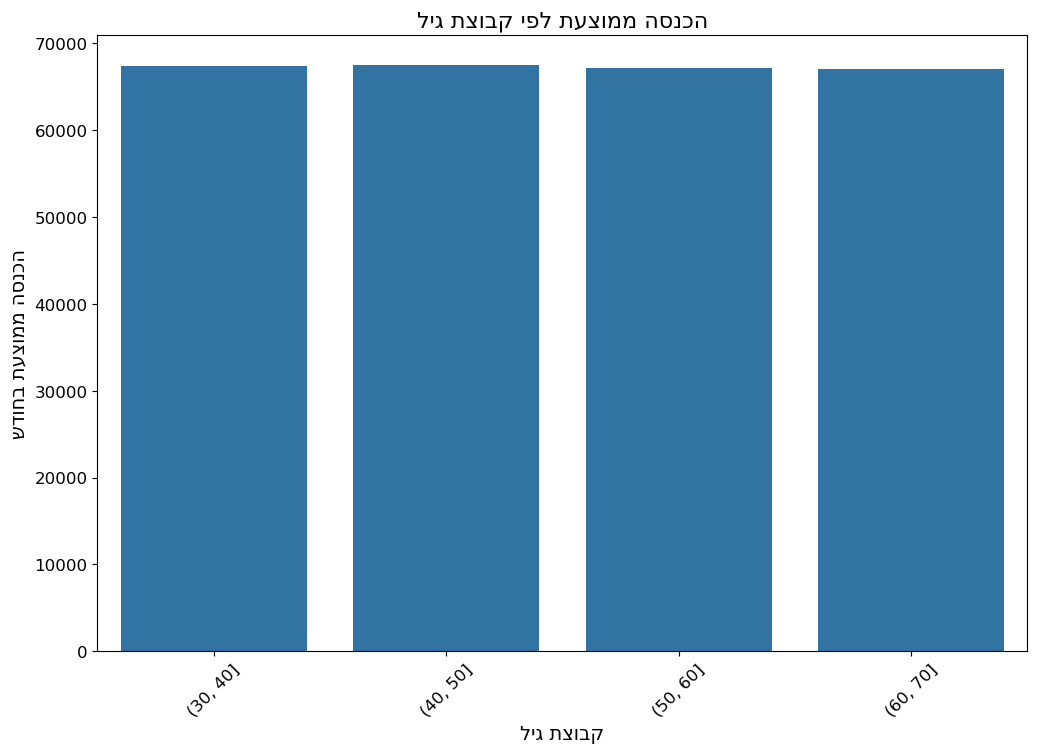

In [34]:
age_bins = [30, 40, 50, 60, 70]
summery['age_group'] = pd.cut(summery['age'], bins=age_bins)
income_by_age_group = summery.groupby('age_group', observed=True)['income_per_month'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='age_group', y='income_per_month', data=income_by_age_group)
plt.xlabel(get_display('קבוצת גיל'), fontsize=14)
plt.ylabel(get_display('הכנסה ממוצעת בחודש'), fontsize=14)
plt.title(get_display('הכנסה ממוצעת לפי קבוצת גיל'), fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

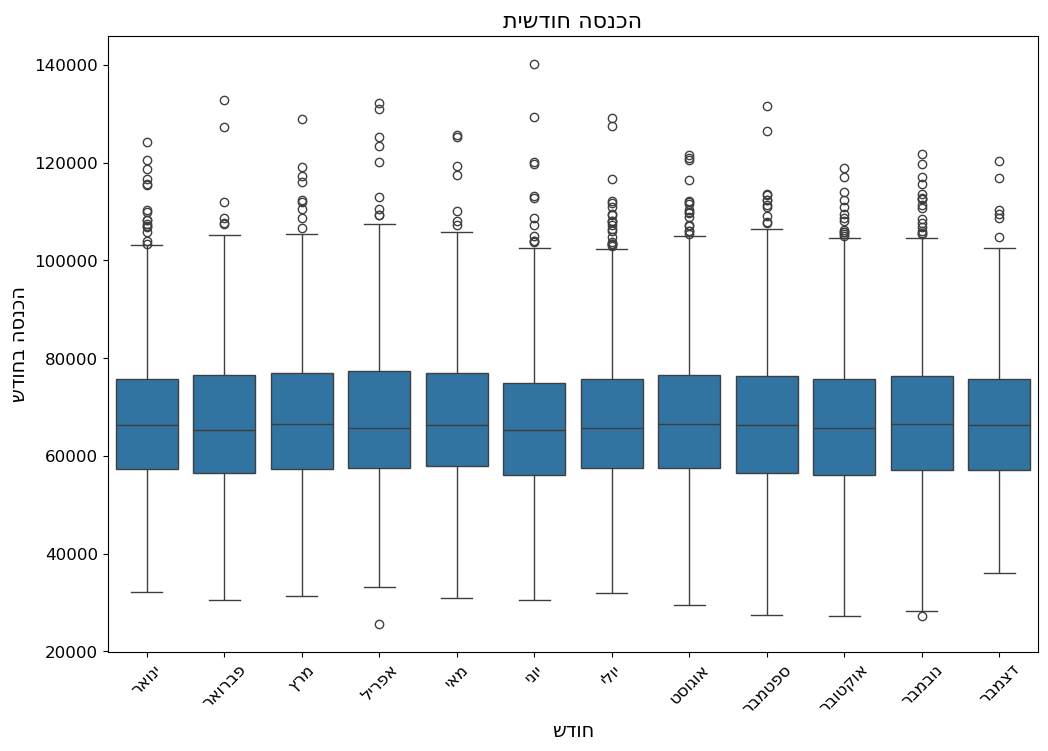

In [45]:
plt.figure(figsize=(12, 8))
summery['month'] = pd.Categorical(summery['date'].apply(lambda x: datetime.strptime(x.split(' ')[0], '%B').strftime('%B')), 
                                  categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                  ordered=True)
hebrew_months = {
    'January': get_display('ינואר'), 'February': get_display('פברואר'), 'March': get_display('מרץ'), 'April': get_display('אפריל'),
    'May': get_display('מאי'), 'June': get_display('יוני'), 'July': get_display('יולי'), 'August': get_display('אוגוסט'),
    'September': get_display('ספטמבר'), 'October': get_display('אוקטובר'), 'November': get_display('נובמבר'), 'December': get_display('דצמבר')
}
summery['month'] = summery['month'].map(hebrew_months)
sns.boxplot(x='month', y='income_per_month', data=summery)
plt.title(get_display('הכנסה חודשית'), fontsize=16)
plt.xlabel(get_display('חודש'), fontsize=14)
plt.ylabel(get_display('הכנסה בחודש'), fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

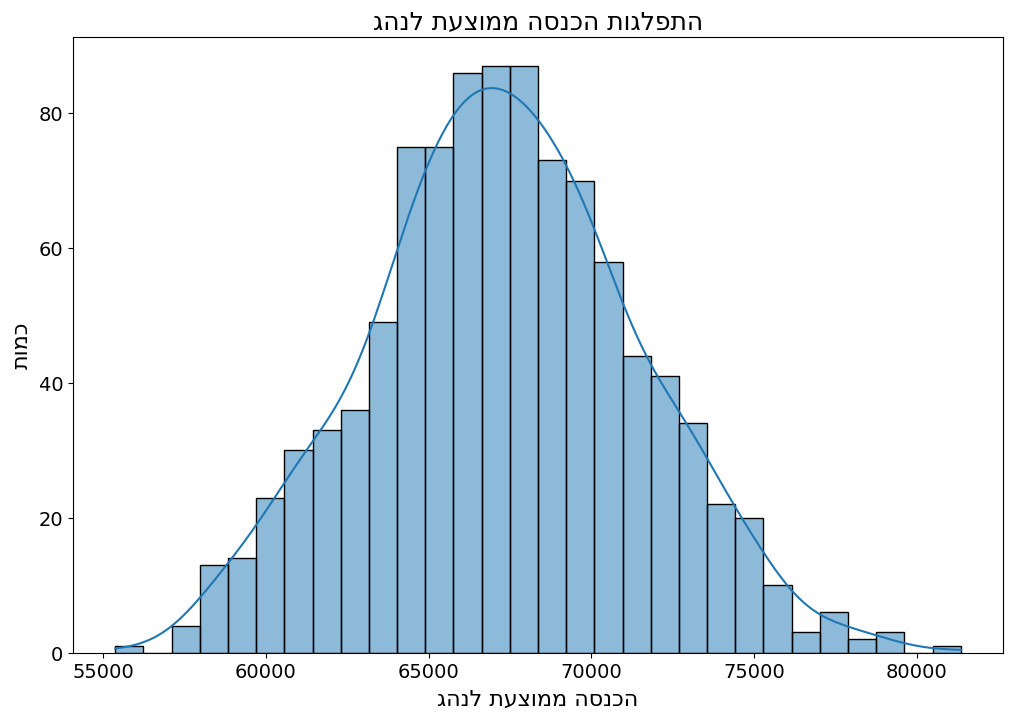

In [46]:
group_by_driver_id = summery.groupby('driver_id', observed=True)
mean_income_per_driver = group_by_driver_id['income_per_month'].mean()
plt.figure(figsize=(12, 8))
sns.histplot(mean_income_per_driver, kde=True, bins=30)
plt.xlabel(get_display('הכנסה ממוצעת לנהג'), fontsize=16)
plt.ylabel(get_display('כמות'), fontsize=16)
plt.title(get_display('התפלגות הכנסה ממוצעת לנהג'), fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

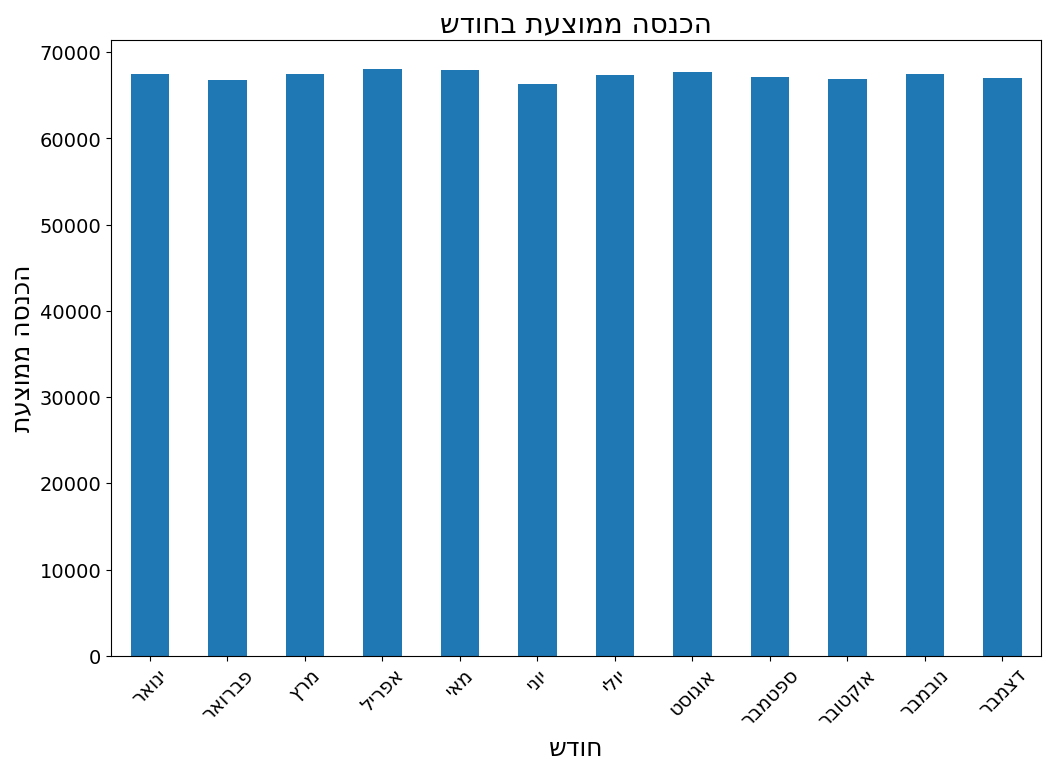

In [47]:
grouped_by_month = summery.groupby('month', observed=True)
mean_income_per_month = grouped_by_month['income_per_month'].mean()
plt.figure(figsize=(12, 8))
mean_income_per_month.plot(kind='bar')
plt.xlabel(get_display('חודש'), fontsize=18)
plt.ylabel(get_display('הכנסה ממוצעת'), fontsize=18)
plt.title(get_display('הכנסה ממוצעת בחודש'), fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

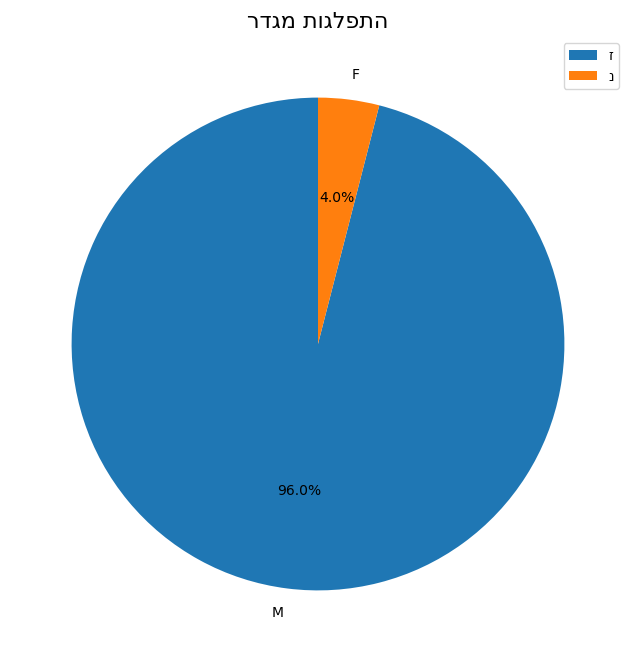

In [48]:
gender_distribution = summery['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title(get_display('התפלגות מגדר'), fontsize=16)
plt.legend(['ז', 'נ'])
plt.show()

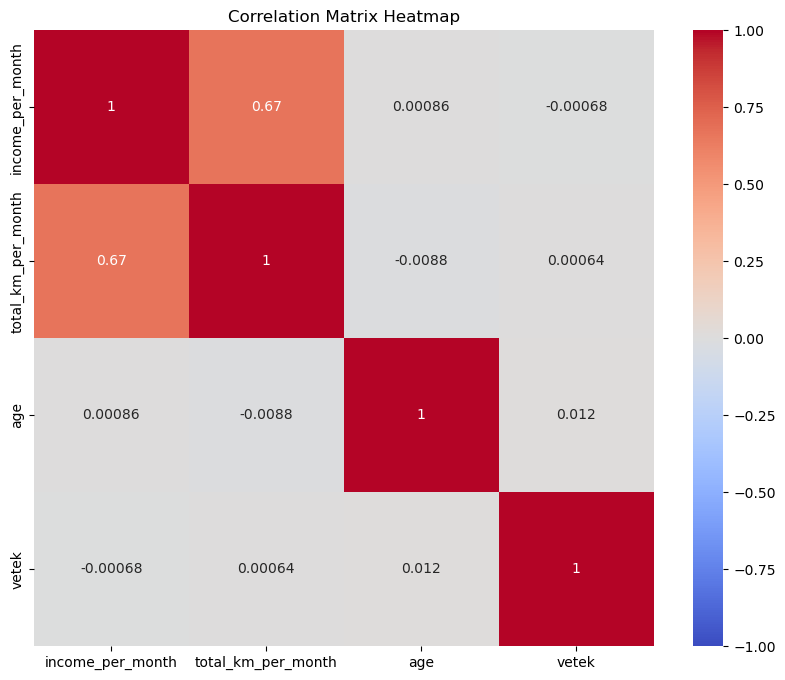

In [49]:
correlation_data = summery[['income_per_month', 'total_km_per_month', 'age', 'vetek']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

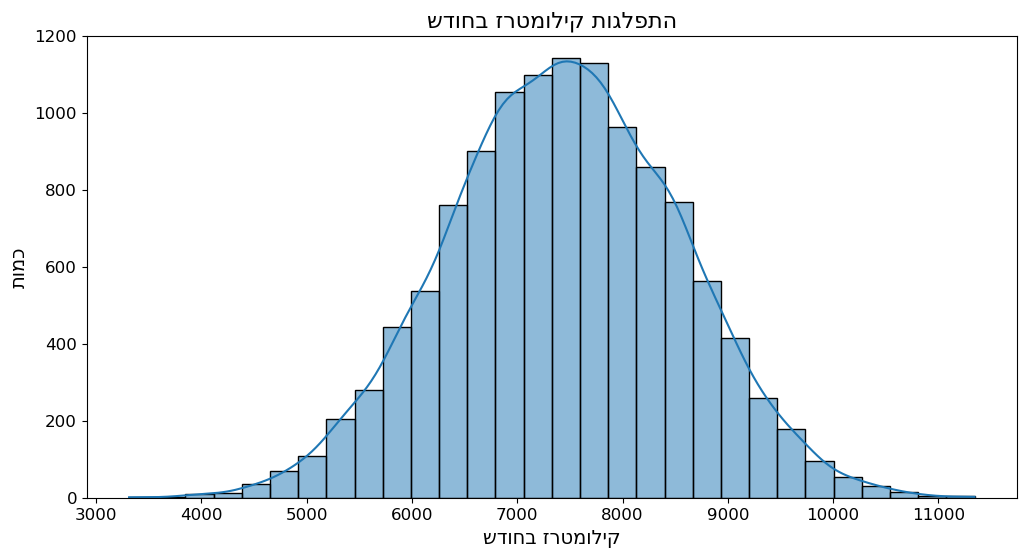

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(summery['total_km_per_month'], bins=30, kde=True)
plt.title(get_display('התפלגות קילומטרז בחודש'), fontsize=16)
plt.xlabel(get_display('קילומטרז בחודש'), fontsize=14)
plt.ylabel(get_display('כמות'), fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

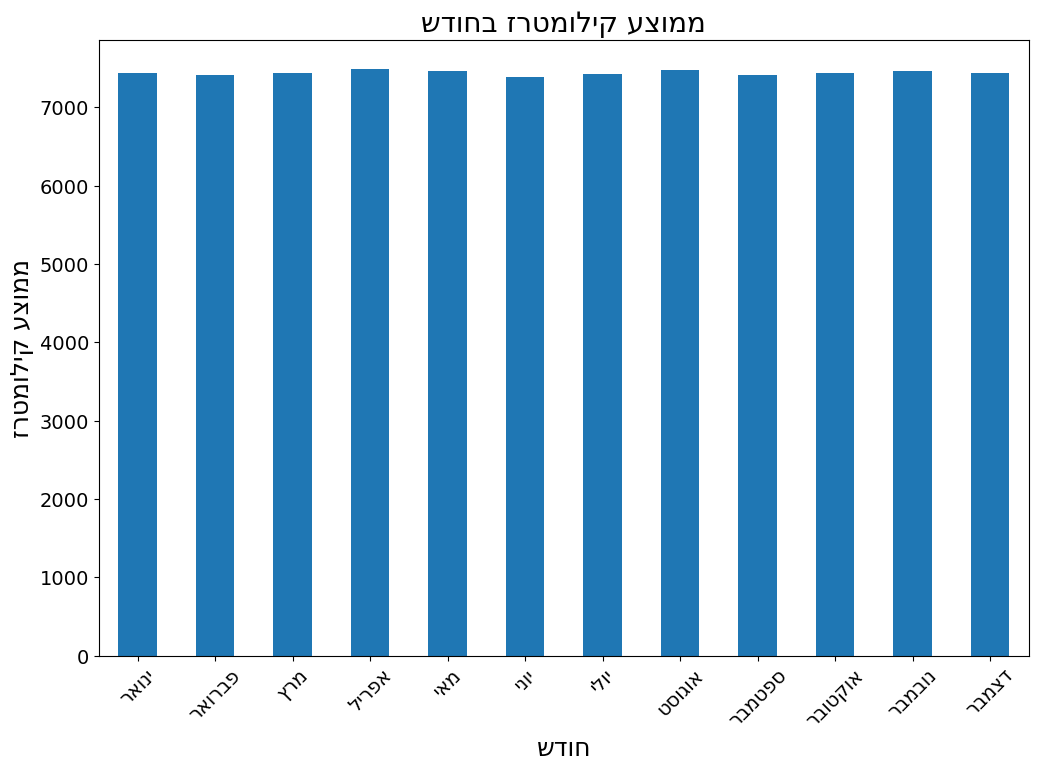

In [51]:
mean_km_per_month = grouped_by_month['total_km_per_month'].mean()
plt.figure(figsize=(12, 8))
mean_km_per_month.plot(kind='bar')
plt.xlabel(get_display('חודש'), fontsize=18)
plt.ylabel(get_display('ממוצע קילומטרז'), fontsize=18)
plt.title(get_display('ממוצע קילומטרז בחודש'), fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()